# SD212: Graph mining
## Lab 3: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

https://scikit-network.readthedocs.io/_/downloads/en/latest/pdf/

## Import

In [35]:
!pip install scikit-network

In [36]:
from IPython.display import SVG

In [37]:
import numpy as np
from scipy import sparse

In [38]:
import sknetwork

In [39]:
from sknetwork.data import load_netset,linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.visualization import svg_graph


## Data

We will work on the following graphs (see the [NetSets](https://graphs.telecom-paristech.fr/Home_page.html#netsets-section) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [40]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## Linear graph

Consider a linear graph:

In [7]:
n = 10

In [8]:
graph = linear_graph(n, True)
adjacency = graph.adjacency
position = graph.position

In [9]:
image = svg_graph(adjacency, position, names=np.arange(n))

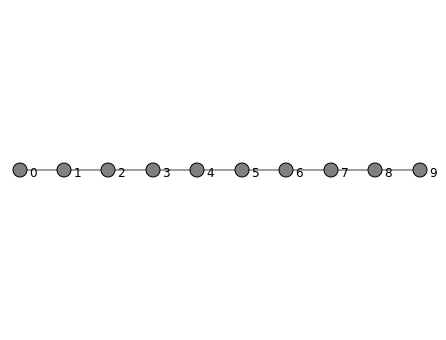

In [10]:
SVG(image)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the exact PageRank vector when $\alpha=1$? You need to compute it!

In [ ]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [ ]:
scores = pagerank.fit_transform(adjacency)

In [ ]:
image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)

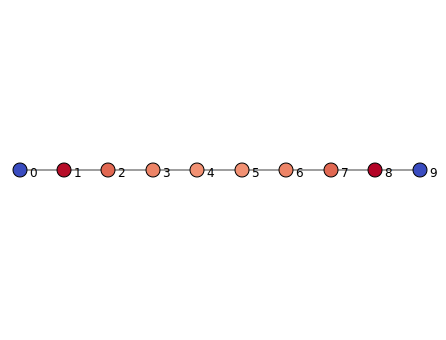

In [ ]:
SVG(image)

## Les Misérables


In [11]:
graph = miserables(True)

In [12]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [13]:
image = svg_graph(adjacency, position, names, scale=2)

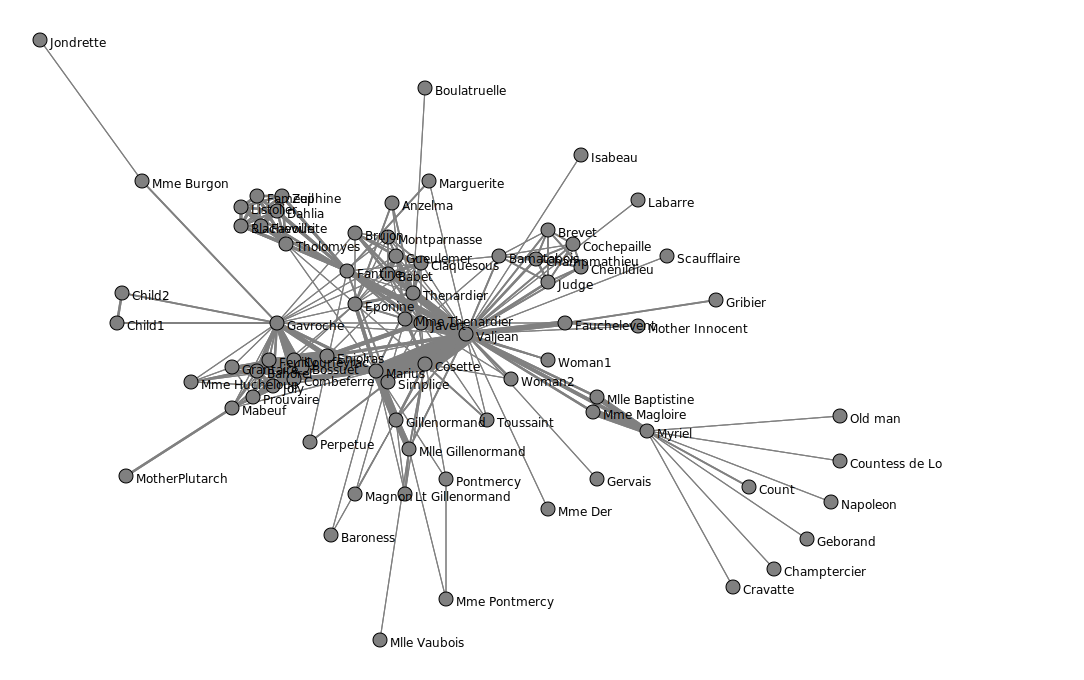

In [14]:
SVG(image)

## To do

* Show the graph with PageRank scores. OK <br>
**Hint:** Use the log of the scores for better visualization.
* List the 10 best ranked characters. OK 
* Compare with: NOT OK 
    1. the 10 nodes of highest degrees, OK 
    2. the 10 nodes of highest weights,
    3. the 10 most frequent nodes under neighbor sampling.
* Try different values of $\alpha$ (e.g., 0.1, 0.9, 0.99) and interpret the results.

In [20]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [21]:
scores = pagerank.fit_transform(adjacency)

In [ ]:
image = svg_graph(adjacency, position, names, scores=np.log(scores))

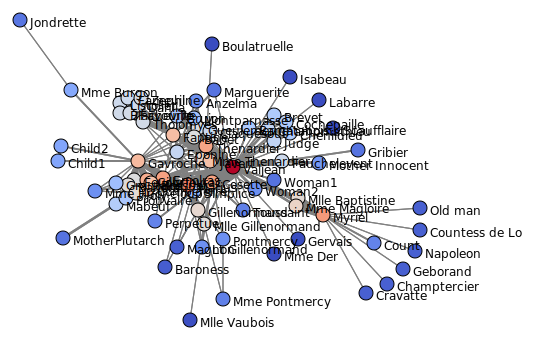

In [ ]:
SVG(image)

In [ ]:
degrees = adjacency.dot(np.ones(len(names)))

In [ ]:
ind_degr = np.argsort(degrees)[:10]
ind_scor = np.argsort(scores)[:10]

In [ ]:
print(names[ind_degr])
print(names[ind_scor])

['Gervais' 'Boulatruelle' 'Jondrette' 'Mlle Vaubois' 'Isabeau' 'Mme Der'
 'Labarre' 'Old man' 'Scaufflaire' 'Cravatte']
['Boulatruelle' 'Isabeau' 'Labarre' 'Gervais' 'Scaufflaire' 'Mme Der'
 'Mlle Vaubois' 'Baroness' 'Magnon' 'Champtercier']


In [23]:
print(names[top_k(scores,10)])
adjacency2 = adjacency>0
print(names[top_k(sum(adjacency2.toarray(),-1),10)])
print(names[top_k(sum(adjacency.toarray(),-1),10)])
pagerank = PageRank(damping_factor=1e-10, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
print(names[top_k(scores, 10)])

['Valjean' 'Myriel' 'Thenardier' 'Marius' 'Gavroche' 'Fantine'
 'Mlle Gillenormand' 'Enjolras' 'Fauchelevent' 'Courfeyrac']
['Valjean' 'Gavroche' 'Marius' 'Javert' 'Thenardier' 'Enjolras' 'Fantine'
 'Bossuet' 'Courfeyrac' 'Joly']
['Valjean' 'Marius' 'Enjolras' 'Courfeyrac' 'Cosette' 'Combeferre'
 'Bossuet' 'Thenardier' 'Gavroche' 'Fantine']
['Valjean' 'Myriel' 'Thenardier' 'Marius' 'Gavroche' 'Fantine'
 'Mlle Gillenormand' 'Enjolras' 'Fauchelevent' 'Courfeyrac']


## Openflights


In [24]:
graph = openflights

In [25]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [26]:
# edges not displayed
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)

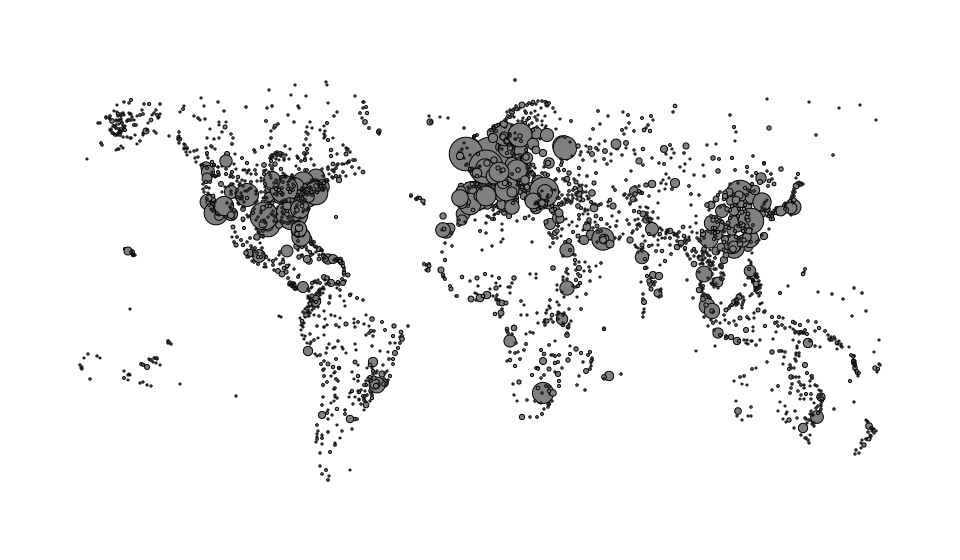

In [27]:
SVG(image)

## To do

* Show the same world map with PageRank scores. OK <br> 
**Hint:** Display nodes in increasing order of scores using the parameter ``node_order`` for better visualization.
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic. NOT OK 
* Show the world map with Personalized PageRank scores, starting from **Tokyo** international airport. OK
* List the corresponding 10 best ranked airports. OK 

In [28]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
image = svg_graph(adjacency, position,  scores=scores,width=800, height=400, display_node_weight=True, display_edges=False)

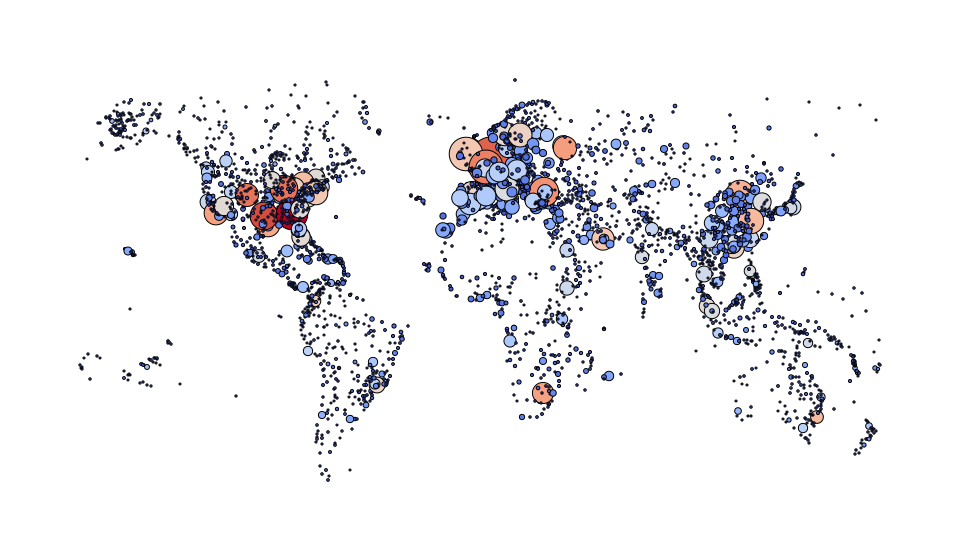

In [29]:
SVG(image)

In [30]:
indexes = np.argsort(-scores)
names[indexes]

array(['Hartsfield Jackson Atlanta International Airport',
       'Dallas Fort Worth International Airport',
       'Amsterdam Airport Schiphol', ..., 'Mannheim-City Airport',
       'Mostar International Airport', 'Arad International Airport'],
      dtype='<U65')

In [34]:
degrees = np.dot(adjacency.toarray(),np.ones(len(names)))
indexes = np.argsort(-degrees)[:10]
names[indexes]

array(['Amsterdam Airport Schiphol',
       'Charles de Gaulle International Airport', 'Dublin Airport',
       'Munich International Airport',
       'Hartsfield Jackson Atlanta International Airport',
       'London Gatwick Airport',
       'Frankfurt am Main International Airport',
       'Atatürk International Airport',
       'Dallas Fort Worth International Airport',
       'Beijing Capital International Airport'], dtype='<U65')

In [31]:
{i: name for i, name in enumerate(names) if 'Tokyo' in name}
seeds = np.zeros(len(names))
seeds[1084]=1
scores = pagerank.fit_transform(adjacency,seeds)
indexes = np.argsort(-scores)
names[indexes]

array(['Tokyo Haneda International Airport',
       'Incheon International Airport', 'Naha Airport', ...,
       'Peawanuck Airport', 'Akureyri Airport', 'Thule Air Base'],
      dtype='<U65')

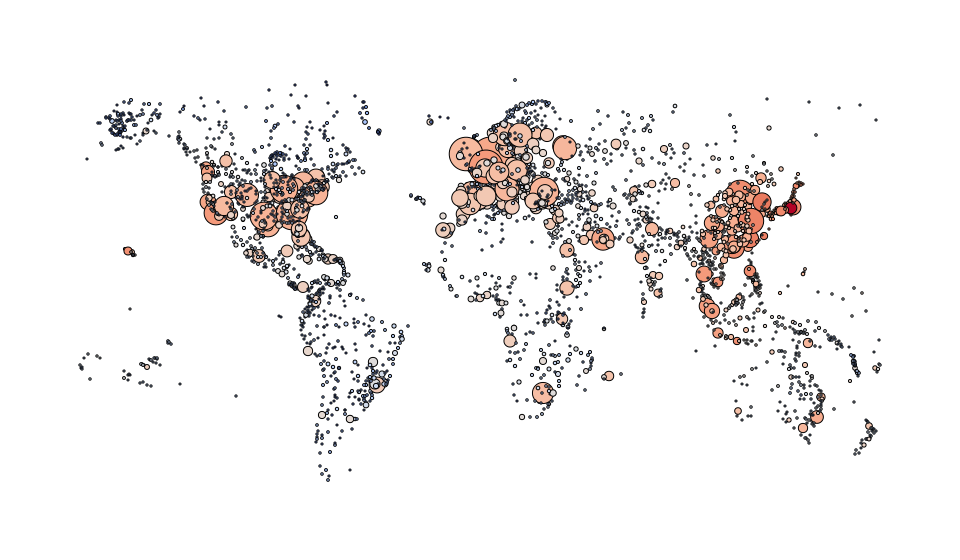

In [ ]:
image = svg_graph(adjacency, position,  scores=np.log(scores),width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

## 2. Digraphs

PageRank applies to directed graphs as well. In fact, it was originally designed for the Web graph, which is a directed graph.

## Wikipedia Vitals

In [41]:
graph = wikivitals

In [42]:
adjacency = graph.adjacency
names = graph.names

## To do

* List the 10 best ranked pages of Wikipedia Vitals. OK 
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results. OK
* Which article of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees? Tous mais c'est bizarre du coup

In [43]:
scores = pagerank.fit_transform(adjacency)

In [44]:
indexes = np.argsort(-scores)

In [45]:
names[indexes][:20]

array(['Bibliothèque nationale de France', 'United States',
       'Geographic coordinate system', 'The New York Times', 'France',
       'India', 'Latin', 'China', 'United Kingdom', 'World War II',
       'Encyclopædia Britannica', 'Russia', 'Germany', 'Australia',
       'Italy', 'Canada', 'Japan', 'Spain', 'Greek language', 'Europe'],
      dtype='<U62')

In [46]:
n = len(names)

In [ ]:
d_out = adjacency.dot(np.ones(n))

In [ ]:
names_out = np.argsort(d_out)
names[names_out][:20]

array(['Gloss (optics)', 'Goby', 'Arm wrestling', 'Word processor',
       'Impartiality', 'Cobra', 'La Princesse de Clèves', 'Kanō Masanobu',
       'Root canal', 'Class field theory', 'Pachacuti',
       'Military reserve', 'Peninsula', 'New Years Day (band)',
       'To the Lighthouse', 'Herman Hollerith', 'Carl Theodor Dreyer',
       'Elastic modulus', 'Kamehameha I', 'Subsidy'], dtype='<U62')

In [ ]:
d_in = adjacency.T.dot(np.ones(n))

In [ ]:
names_in = np.argsort(d_in)
names[names_in][:20]

array(['Sonchus', 'Tumucumaque Mountains National Park',
       'New Years Day (band)', '−1', 'Collard (plant)', 'Eruca vesicaria',
       'Stratigraphic unit', 'Cirsium', 'Alstroemeria',
       'Pontederia crassipes', 'Hurrem Sultan',
       'James Gordon Bennett Sr.', 'Alla Pugacheva', 'Teresa Teng',
       'Galaxiidae', 'Muhammad II of Khwarazm',
       "Banc d'Arguin National Park", 'River kingfisher',
       'Estée Lauder (businesswoman)', 'Puduḫepa'], dtype='<U62')

## To do

* List the 20 closest pages to **Pablo Picasso** in Wikipedia Vitals. What is the best ranked painter other than Picasso? OK 
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals. OK

In [ ]:
ind_pica = np.argwhere(names=='Pablo Picasso')[0][0]

In [ ]:
seeds = np.zeros(len(names))
seeds[ind_pica] = 1

In [ ]:
scores = pagerank.fit_transform(adjacency,seeds)

In [ ]:
indexes = np.argsort(-scores)

In [ ]:
names[indexes][:20]

array(['Pablo Picasso', 'Bibliothèque nationale de France',
       'The New York Times', 'Paris', 'Modernism', 'Museum of Modern Art',
       'Cubism', 'Avant-garde', 'Symbolism (arts)', 'Impressionism',
       'Romanticism', 'Spain', 'France', 'Metropolitan Museum of Art',
       'Surrealism', 'United States', 'Geographic coordinate system',
       'Vincent van Gogh', 'World War II', 'Paul Cézanne'], dtype='<U62')

In [ ]:
ind_dog = np.argwhere(names=='Dog')[0][0]

In [ ]:
ind_cat = np.argwhere(names=='Cat')[0][0]

In [ ]:
seeds = np.zeros(len(names))
seeds[ind_dog] = 1
seeds[ind_cat] = 1

In [ ]:
scores = pagerank.fit_transform(adjacency,seeds)
indexes = np.argsort(-scores)
names[indexes][:20]

array(['Dog', 'Cat', 'Bibliothèque nationale de France',
       'Taxonomy (biology)', 'Animal', 'Mammal', 'Chordate',
       'Middle Ages', 'India', 'The New York Times', 'China', 'Latin',
       'United States', 'Pinniped', 'Lion', 'Bear', 'Carl Linnaeus',
       'Leopard', 'Polar bear', 'Brown bear'], dtype='<U62')

## 3. Bigraphs

PageRank is less frequently used for bipartite graphs. It is very useful in this case as well.

## Cinema

In [47]:
graph = cinema

In [48]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* List the top-10 movies in terms of PageRank. OK
* List the 5 closest movies to **Mon Oncle**. OK 
* List the 5 closest actors to **Catherine Deneuve**. OK 

bi adjacency to undirected

ou bipartite2undirected

In [49]:
pagerank = BiPageRank()

In [50]:
pagerank.fit(biadjacency)

BiPageRank(damping_factor=0.85, solver='piteration', n_iter=10, tol=0)

In [51]:
scores_movies = pagerank.scores_row_

In [53]:
indexes = np.argsort(-scores_movies)[:10]
movies[indexes]

array(['The Walking Dead (TV series)', 'Tatort', 'Twin Peaks',
       'Homeland (TV series)', 'House of Cards (U.S. TV series)',
       'Prêt-à-Porter', 'St. Elsewhere', 'Peaky Blinders (TV series)',
       'Seances', 'Arrow (TV series)'], dtype='<U95')

In [54]:
ind_mononcle = np.argwhere(movies=='Mon Oncle')[0][0]
seeds = np.zeros(len(movies))
seeds[ind_mononcle] = 1
pagerank = BiPageRank()
pagerank.fit(biadjacency,seeds_row=seeds)
scores_movies = pagerank.scores_row_
indexes = np.argsort(-scores_movies)[:10]
movies[indexes]

array(['Mon Oncle', 'Jour de fête', 'Cours du soir', 'Gai dimanche',
       'Touchez pas au grisbi', 'The Discreet Charm of the Bourgeoisie',
       'The Milky Way (1969 film)', 'Les Amants du pont Saint-Jean',
       'Five Red Tulips', 'Los Olvidados'], dtype='<U95')

In [ ]:
ind_deneuve = np.argwhere(actors=='Catherine Deneuve')[0][0]

In [ ]:
seeds = np.zeros(len(actors))
seeds[ind_deneuve] = 1

In [ ]:
scores = pagerank.fit(biadjacency, seeds_col=seeds).scores_col_

In [ ]:
indexes = np.argsort(-scores)[:10]
actors[indexes]

array(['Catherine Deneuve', 'Marcello Mastroianni', 'Gérard Depardieu',
       'Michel Piccoli', 'Chiara Mastroianni', 'Jean-Louis Trintignant',
       'John Malkovich', 'Jacques Perrin', 'Alain Delon',
       'Danielle Darrieux'], dtype='<U95')

## 4. Digraphs as bigraphs

Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph. 

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

## Wikipedia Vitals

In [55]:
graph = wikivitals

In [56]:
adjacency = graph.adjacency
names = graph.names

## To do

Do the same experiments as above using BiPageRank:
* List the 10 best ranked pages of Wikipedia Vitals. Give 2 rankings: one for rows, the other for columns. OK
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results. A FAIRE 

In [58]:
pagerank = BiPageRank()

In [59]:
pagerank.fit(adjacency)

BiPageRank(damping_factor=0.85, solver='piteration', n_iter=10, tol=0)

In [60]:
score_col = pagerank.scores_col_
score_row = pagerank.scores_row_

In [61]:
indexes_col = np.argsort(-score_col)[:10]
indexes_row = np.argsort(-score_row)[:10]

In [62]:
print(names[indexes_col])
print(names[indexes_row])

['Bibliothèque nationale de France' 'United States' 'The New York Times'
 'India' 'Geographic coordinate system' 'China' 'France' 'Latin'
 'United Kingdom' 'World War II']
['Europe' 'History of the world' 'Modern history' 'France' 'Africa'
 'History of art' 'United States' 'Russia' 'Asia' 'History of Europe']


## To do

Using BiPageRank:
* List the 20 closest pages to **Picasso** in Wikipedia Vitals. 
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In your opinion, what is the best algorithm for content recommendation, PageRank or BiPageRank?<br>
Justify your answer.

In [ ]:
ind_pica = np.argwhere(names=='Pablo Picasso')[0][0]

In [ ]:
seeds = np.zeros(len(names))
seeds[ind_pica] = 1

In [ ]:
pagerank.fit(adjacency,seeds_col=seeds , seeds_row=seeds)

BiPageRank(damping_factor=0.85, solver=None, n_iter=10)

In [ ]:
scores = pagerank.scores_col_
scores2 = pagerank.scores_row_
score = scores+scores2

In [ ]:
indexes = np.argsort(-score)
names[indexes][:20]

array(['Pablo Picasso', 'Modernism', 'Cubism',
       'Bibliothèque nationale de France', 'Modern art', 'Impressionism',
       'Surrealism', 'Avant-garde', 'Symbolism (arts)', 'Expressionism',
       'Dada', 'Paul Klee', 'Wassily Kandinsky', 'Futurism',
       'Thomas Mann', 'Postmodernism', 'Abstract expressionism',
       'Minimalism', 'Franz Kafka', 'Modern architecture'], dtype='<U62')